In [1]:
!pip install kaggle

In [0]:
import tensorflow as tf
import tensorflow.contrib as tfcontrib
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
import sys
from tensorflow.python.keras import backend as K


In [0]:
import os
import glob
import zipfile
import functools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.figsize'] = (12,12)

from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!ls /content/drive/My\ Drive/Semantic\ dataset100/

 ground-truth   image  'read me.txt'   result.txt   test


In [6]:
!pwd


/content


In [0]:

img_dir = "/content/drive/My\ Drive/Semantic\ dataset100/image"
label_dir = "/content/drive/My\ Drive/Semantic\ dataset100/ground_truth"

x_train_filenames = []
y_train_filenames = []
import cv2

In [8]:
%cd /content/drive/My\ Drive/Semantic\ dataset100/image


/content/drive/My Drive/Semantic dataset100/image


In [0]:
path = '/content/drive/My Drive/Semantic dataset100/image'

In [0]:
for filename in os.listdir("/content/drive/My Drive/Semantic dataset100/image"):
      
       
      
      x_train_filenames.append("/content/drive/My Drive/Semantic dataset100/image/" + filename)
      

In [11]:
len(x_train_filenames)

100

In [12]:
%cd /content/drive/My\ Drive/Semantic\ dataset100/ground-truth

/content/drive/My Drive/Semantic dataset100/ground-truth


In [0]:
y_train_filenames = []

In [14]:
i = 0
for filename in os.listdir("/content/drive/My Drive/Semantic dataset100/image"):
        
      #print(str(filename.split("/")[-1]))
       
        
      for filename1 in os.listdir("/content/drive/My Drive/Semantic dataset100/ground-truth"):
                                 
        if(str(filename.split("/")[-1].split(".")[0]) == str(filename1.split("/")[-1].split(".")[0])):
          print(i)
          i =i+1 
          y_train_filenames.append("/content/drive/My Drive/Semantic dataset100/ground-truth/" + filename1)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [15]:
y_train_filenames[25]

'/content/drive/My Drive/Semantic dataset100/ground-truth/130014.png'

In [16]:
len(y_train_filenames)

100

In [0]:
x_train_filenames, x_val_filenames, y_train_filenames, y_val_filenames = \
                    train_test_split(x_train_filenames, y_train_filenames, test_size=0.2, random_state=42)

In [0]:
num_train_examples = len(x_val_filenames)
num_val_examples = len(x_val_filenames)

In [19]:
%cd /content/drive/My\ Drive/Semantic\ dataset100/image

/content/drive/My Drive/Semantic dataset100/image


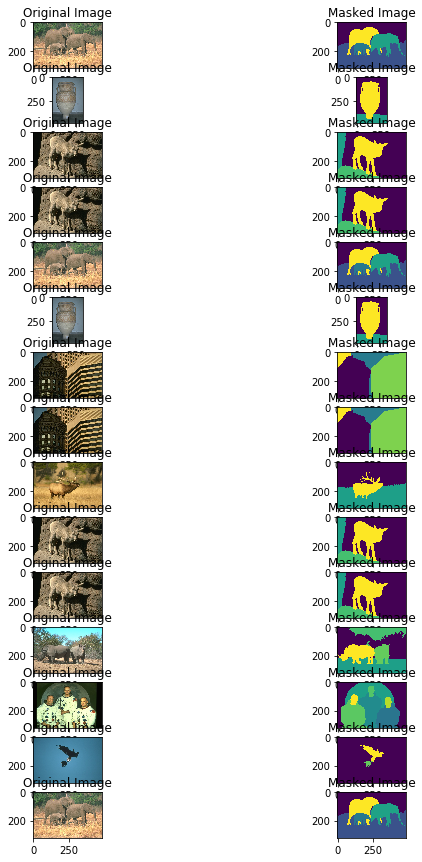

In [20]:
display_num = 15

r_choices = np.random.choice(num_train_examples, display_num)

plt.figure(figsize=(10, 15))
for i in range(0, display_num * 2, 2):
  img_num = r_choices[i // 2]
  x_pathname = x_train_filenames[img_num]
  y_pathname = y_train_filenames[img_num]
  
  plt.subplot(display_num, 2, i + 1)
  plt.imshow(mpimg.imread(x_pathname))
  plt.title("Original Image")
  

  example_labels = Image.open(y_pathname)
  
  label_vals = np.unique(example_labels)
  
  plt.subplot(display_num, 2, i + 2)
  plt.imshow(example_labels)
  plt.title("Masked Image")

In [0]:
def _augment(img,
             label_img,
             resize=None,  # Resize the image to some size e.g. [256, 256]
             scale=1,  # Scale image e.g. 1 / 255.
             hue_delta=0,  # Adjust the hue of an RGB image by random factor
             horizontal_flip=False,  # Random left right flip,
             width_shift_range=0,  # Randomly translate the image horizontally
             height_shift_range=0):  # Randomly translate the image vertically 
  if resize is not None:
    # Resize both images
    label_img = tf.image.resize_images(label_img, resize)
    img = tf.image.resize_images(img, resize)
  
  if hue_delta:
    img = tf.image.random_hue(img, hue_delta)
  
  img, label_img = flip_img(horizontal_flip, img, label_img)
  img, label_img = shift_img(img, label_img, width_shift_range, height_shift_range)
  label_img = tf.to_float(label_img) * scale
  img = tf.to_float(img) * scale 
  return img, label_img

In [0]:
def flip_img(horizontal_flip, tr_img, label_img):
  if horizontal_flip:
    flip_prob = tf.random_uniform([], 0.0, 1.0)
    tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                lambda: (tf.image.flip_left_right(tr_img), tf.image.flip_left_right(label_img)),
                                lambda: (tr_img, label_img))
  return tr_img, label_img


In [0]:
img_shape = (256, 256, 3)
batch_size = 3
epochs = 5

In [0]:
def process_pathnames(fname,lname):
  img_file = tf.read_file(fname)
  img = tf.image.decode_jpeg(img_file,channels = 3)
  mask_file = tf.read_file(lname)
  msk = tf.image.decode_png(mask_file,channels = 3)
  label_img = msk[:, :, 0]
  label_img = tf.expand_dims(label_img, axis=-1)
  return img,label_img

In [0]:
def shift_img(output_img, label_img, width_shift_range, height_shift_range):
  """This fn will perform the horizontal or vertical shift"""
  if width_shift_range or height_shift_range:
      if width_shift_range:
        width_shift_range = tf.random_uniform([], 
                                              -width_shift_range * img_shape[1],
                                              width_shift_range * img_shape[1])
      if height_shift_range:
        height_shift_range = tf.random_uniform([],
                                               -height_shift_range * img_shape[0],
                                               height_shift_range * img_shape[0])
      # Translate both 
      output_img = tfcontrib.image.translate(output_img,
                                             [width_shift_range, height_shift_range])
      label_img = tfcontrib.image.translate(label_img,
                                             [width_shift_range, height_shift_range])
  return output_img, label_img

In [0]:
def get_baseline_dataset(filenames,labels,preproc_fn = functools.partial(_augment),threads = 5,batch_size = batch_size,shuffle = True):
  num = len(filenames)
  data = tf.data.Dataset.from_tensor_slices((filenames,labels))
  data = data.map(process_pathnames, num_parallel_calls = threads)
  
  if preproc_fn.keywords is not None and 'resize' not in preproc_fn.keywords:
    assert batch_size == 1, "Batching images must be of the same size"
  data = data = data.map(preproc_fn , num_parallel_calls = threads)
  if shuffle : 
    data = data.shuffle(num)
  dataset = data.repeat().batch(batch_size)
  return dataset


In [0]:
tr_cfg = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
    'hue_delta': 0.1,
    'horizontal_flip': True,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1
}
tr_preprocessing_fn = functools.partial(_augment, **tr_cfg)

In [0]:
val_cfg = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
}
val_preprocessing_fn = functools.partial(_augment, **val_cfg)

In [29]:
train_ds = get_baseline_dataset(x_train_filenames,y_train_filenames,preproc_fn = tr_preprocessing_fn,batch_size = batch_size )
val_ds = get_baseline_dataset(x_train_filenames,y_train_filenames,preproc_fn = val_preprocessing_fn ,batch_size = batch_size)




W0718 08:25:28.974014 140562436523904 deprecation.py:323] From <ipython-input-21-f968a7d06a00>:19: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


W0718 08:25:31.116203 140562436523904 deprecation.py:323] From <ipython-input-30-461b49cb2dcf>:7: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


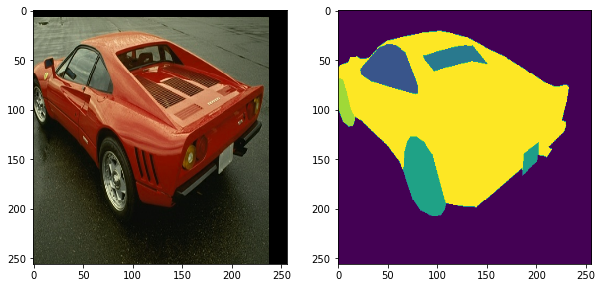

In [30]:
temp_ds = get_baseline_dataset(x_train_filenames, 
                               y_train_filenames,
                               preproc_fn=tr_preprocessing_fn,
                               batch_size=1,
                               shuffle=False)
# Let's examine some of these augmented images
data_aug_iter = temp_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()
with tf.Session() as sess: 
  batch_of_imgs, label = sess.run(next_element)

  # Running next element in our graph will produce a batch of images
  plt.figure(figsize=(10, 10))
  img = batch_of_imgs[0]

  plt.subplot(1, 2, 1)
  plt.imshow(img)

  plt.subplot(1, 2, 2)
  plt.imshow(label[0, :, :, 0])
  plt.show()

In [0]:
#now make model and train it fast


def conv(input,num_filters):
  layer1 = layers.Conv2D(num_filters , (3,3) , padding = 'same')(input)
  layer2  = layers.BatchNormalization()(layer1)
  layer3 = layers.Activation('relu')(layer2)
  layer4 = layers.Conv2D(num_filters , (3,3) , padding = 'same')(layer3)
  layer5  = layers.BatchNormalization()(layer4)
  layer6 = layers.Activation('relu')(layer5)
  return layer6

def encoder(input,num_filters):
  x = conv(input,num_filters)
  pool = layers.MaxPooling2D((2,2), strides = (2,2))(x)
  return pool , x


def decoder(input,concat,num_filters):
   x = layers.Conv2DTranspose(num_filters , (2,2) ,strides = (2,2) , padding = 'same')(input)
   x = layers.concatenate([x,concat] , axis = -1)
   x = layers.BatchNormalization()(x)
   decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(x)
   decoder = layers.BatchNormalization()(decoder)
   decoder = layers.Activation('relu')(decoder)
   decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
   decoder = layers.BatchNormalization()(decoder)
   decoder = layers.Activation('relu')(decoder)
   return decoder 
  
  
  
  

In [32]:
inputs  = layers.Input(shape = img_shape)
enp1 , en1 = encoder(inputs , 32)
enp2 , en2 = encoder(enp1 , 64)
enp3 , en3 = encoder(enp2 , 128)
enp4 , en4 = encoder(enp3 , 256)
enp5 , en5 = encoder(enp4 , 512)
center = conv(enp5 , 1024)
decoder4 = decoder(center, en5, 512)
decoder3 = decoder(decoder4, en4, 256)
# 32
decoder2 = decoder(decoder3, en3, 128)
# 64
decoder1 = decoder(decoder2, en2, 64)
# 128
decoder0 = decoder(decoder1, en1, 32)
outputs = layers.Conv2D(1 ,(1,1) , activation = 'sigmoid')(decoder0)




W0718 08:25:36.631956 140562436523904 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model = models.Model(inputs = [inputs] , outputs = [outputs])


In [0]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score
    

In [0]:
def dice_loss(y_true,y_pred):
  loss = 1 - dice_coeff(y_true,y_pred)
  return loss

In [0]:
def bce_dice_loss(y_true, y_pred):
    loss = losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [37]:
model.compile(optimizer = 'adam' , loss = bce_dice_loss , metrics = [dice_loss])
model.summary()

W0718 08:25:43.926000 140562436523904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [38]:
save_model_path = '/tmp/weights.hdf5'
cp = tf.keras.callbacks.ModelCheckpoint(filepath=save_model_path, monitor='val_dice_loss', save_best_only=True, verbose=1)
history = model.fit(train_ds, 
                   steps_per_epoch=int(np.ceil(num_train_examples / float(batch_size))),
                   epochs=10,
                   validation_data=val_ds,
                   validation_steps=int(np.ceil(num_val_examples / float(batch_size))),
                    
                   callbacks=[cp])

Epoch 1/10
6/7 [========================>.....] - ETA: 12s - loss: 1.5224 - dice_loss: 0.6488
Epoch 00001: val_dice_loss improved from inf to 0.61807, saving model to /tmp/weights.hdf5
7/7 [==============================] - 110s 16s/step - loss: 1.5194 - dice_loss: 0.6456 - val_loss: 1.3100 - val_dice_loss: 0.6181
Epoch 2/10
6/7 [========================>.....] - ETA: 9s - loss: 1.2624 - dice_loss: 0.5890 
Epoch 00002: val_dice_loss did not improve from 0.61807
7/7 [==============================] - 80s 11s/step - loss: 1.2599 - dice_loss: 0.5869 - val_loss: 1.3185 - val_dice_loss: 0.6359
Epoch 3/10
6/7 [========================>.....] - ETA: 9s - loss: 1.3168 - dice_loss: 0.6515 
Epoch 00003: val_dice_loss did not improve from 0.61807
7/7 [==============================] - 80s 11s/step - loss: 1.2871 - dice_loss: 0.6324 - val_loss: 1.3067 - val_dice_loss: 0.6443
Epoch 4/10
6/7 [========================>.....] - ETA: 9s - loss: 1.1553 - dice_loss: 0.5746 
Epoch 00004: val_dice_loss imp

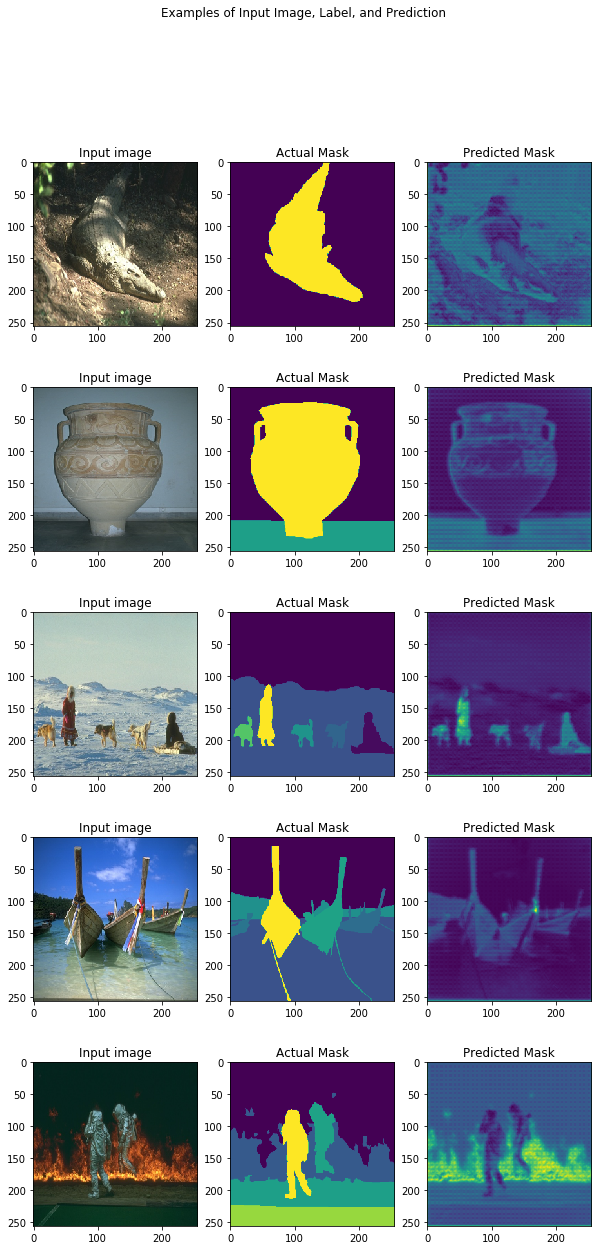

In [39]:

data_aug_iter = val_ds.make_one_shot_iterator()
next_element = data_aug_iter.get_next()

# Running next element in our graph will produce a batch of images
plt.figure(figsize=(10, 20))
for i in range(5):
  batch_of_imgs, label = tf.keras.backend.get_session().run(next_element)
  img = batch_of_imgs[0]
  predicted_label = model.predict(batch_of_imgs)[0]

  plt.subplot(5, 3, 3 * i + 1)
  plt.imshow(img)
  plt.title("Input image")
  
  plt.subplot(5, 3, 3 * i + 2)
  plt.imshow(label[0, :, :, 0])
  plt.title("Actual Mask")
  plt.subplot(5, 3, 3 * i + 3)
  plt.imshow(predicted_label[:, :, 0])
  plt.title("Predicted Mask")
plt.suptitle("Examples of Input Image, Label, and Prediction")
plt.show()